In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist

Using TensorFlow backend.


(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

In [2]:
#Loading MNIST Dataset
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()


Text(0.5, 1.0, 'Class 0')

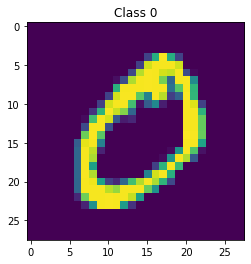

In [3]:
plt.imshow(X_train[1])
plt.title("Class " + str(Y_train[1]))

In [4]:
#Noramlizing The Dataset
X_train=X_train/255
X_test=X_test/255

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape
from keras.optimizers import SGD

In [6]:
#Encoder Model is being Created
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [7]:
#Decoder Model is being Created
decoder=Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [8]:
#Autoencoder model is being  Created
autoencoder=Sequential([encoder,decoder])

In [9]:
autoencoder.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

In [10]:
autoencoder.fit(X_train,X_train,epochs=10,validation_data=[X_test,X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.1675 - accuracy: 0.8010 - val_loss: 0.1317 - val_accuracy: 0.8062
Epoch 2/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.1254 - accuracy: 0.8083 - val_loss: 0.1187 - val_accuracy: 0.8087
Epoch 3/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.1154 - accuracy: 0.8101 - val_loss: 0.1109 - val_accuracy: 0.8093
Epoch 4/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.1084 - accuracy: 0.8113 - val_loss: 0.1051 - val_accuracy: 0.8106
Epoch 5/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.1040 - accuracy: 0.8120 - val_loss: 0.1019 - val_accuracy: 0.8113
Epoch 6/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.1014 - accuracy: 0.8124 - val_loss: 0.1013 - val_accuracy: 0.8116
Epoch 7/10
60000/60000 [==============================] - 7s 1

In [11]:
predicted_images=autoencoder.predict(X_test[:10])

metric=pd.DataFrame(autoencoder.history.history)
metric.plot()


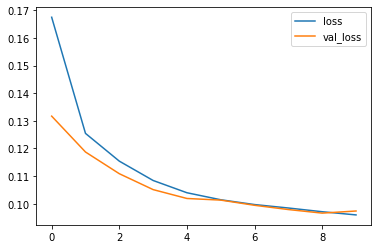

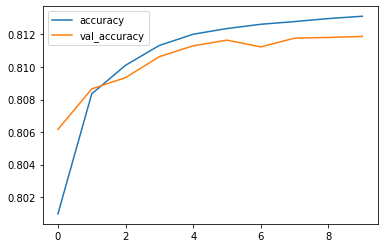

In [12]:
metrics=pd.DataFrame(autoencoder.history.history)
metrics[['loss','val_loss']].plot()

metrics[['accuracy','val_accuracy']].plot()


Original Image


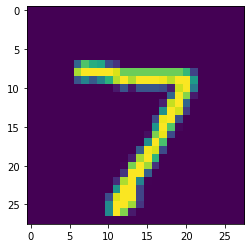

Image Recreated using Autoencoder


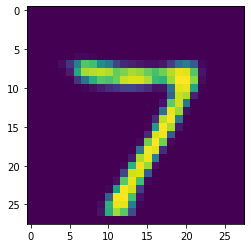

Original Image


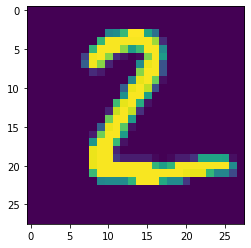

Image Recreated using Autoencoder


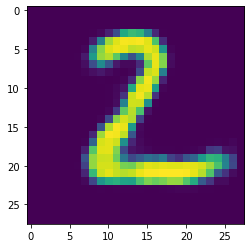

Original Image


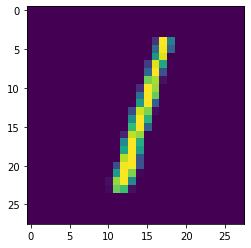

Image Recreated using Autoencoder


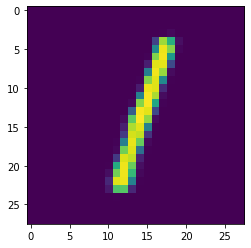

Original Image


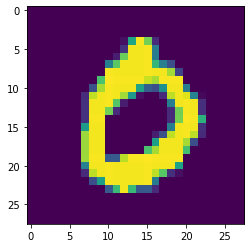

Image Recreated using Autoencoder


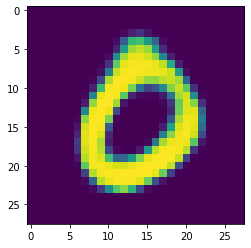

Original Image


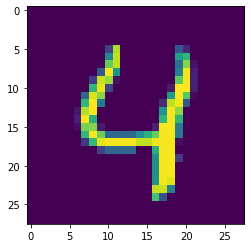

Image Recreated using Autoencoder


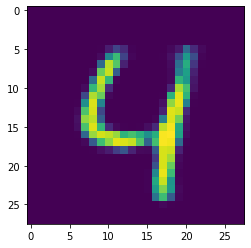

Original Image


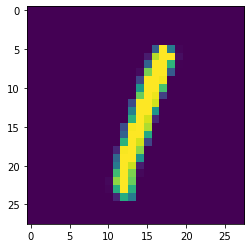

Image Recreated using Autoencoder


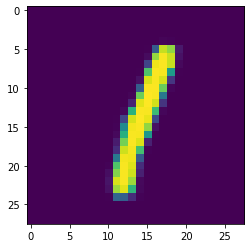

Original Image


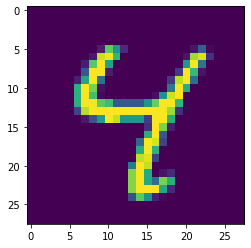

Image Recreated using Autoencoder


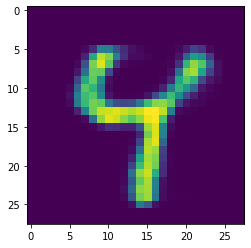

Original Image


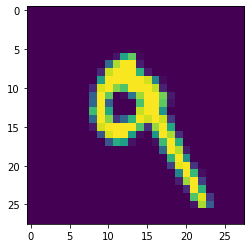

Image Recreated using Autoencoder


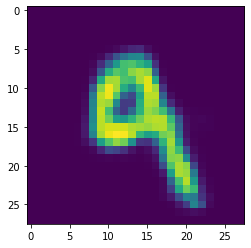

Original Image


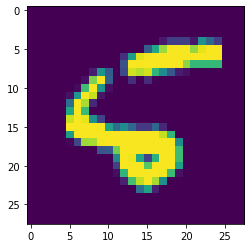

Image Recreated using Autoencoder


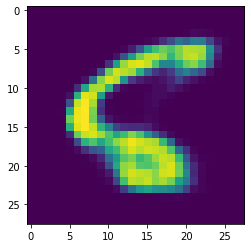

Original Image


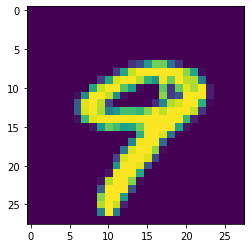

Image Recreated using Autoencoder


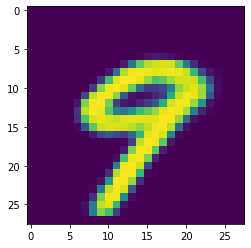

In [13]:
#Here Autoencoder efficency is displayed(IMages are being recreated from the input)
for i in range(10):
    print("Original Image")
    plt.imshow(X_test[i])
    plt.show()
    print("Image Recreated using Autoencoder")
    plt.imshow(predicted_images[i])
    plt.show()

In [14]:
from tensorflow.keras.layers import GaussianNoise



In [15]:
#Noise Parameters are being created
sample_noise=GaussianNoise(0.4)
noisey_image=sample_noise(X_test[:10],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Original Image


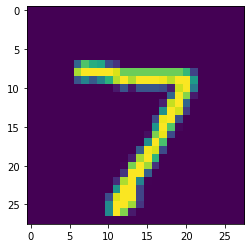

Noise Version


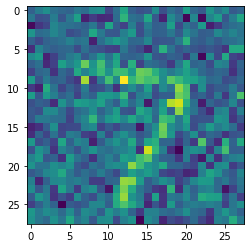

In [16]:
#Sample of Noise Image 
n=0
print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("Noise Version")
plt.imshow(noisey_image[n])

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import GaussianNoise

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [18]:
tf.random.set_seed(101)
np.random.seed(101)
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))
#Noise layer is being incorporated in the encoder model to make all the images noisey
encoder.add(GaussianNoise(0.4))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))


In [19]:
decoder=Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [20]:
noise_remover=Sequential([encoder,decoder])
noise_remover.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

In [21]:
noise_remover.fit(X_train,X_train,epochs=10,validation_data=[X_test,X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.1834 - accuracy: 0.7994 - val_loss: 0.1431 - val_accuracy: 0.8016
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1401 - accuracy: 0.8064 - val_loss: 0.1318 - val_accuracy: 0.8046
Epoch 3/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1321 - accuracy: 0.8078 - val_loss: 0.1211 - val_accuracy: 0.8086
Epoch 4/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1272 - accuracy: 0.8087 - val_loss: 0.1194 - val_accuracy: 0.8076
Epoch 5/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.1241 - accuracy: 0.8092 - val_loss: 0.1150 - val_accuracy: 0.8094
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1216 - accuracy: 0.8097 - val_loss: 0.1123 - val_accuracy: 0.8102
Epoch 7/10
60000/60000 [==============================] 

In [22]:
#Autoencoder noise removing efficency is being tested here
ten_noise=sample_noise(X_test[:10],training=True)
denoisey_image=noise_remover(ten_noise)


Batch NUmber 0




Original Image


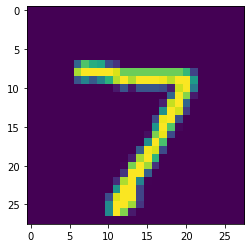



Noise Image


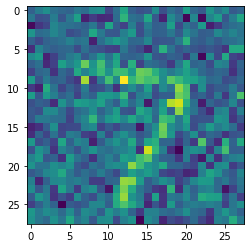



Denoised Image by Autoencoder


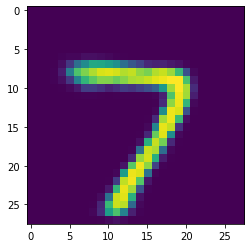



Batch NUmber 1




Original Image


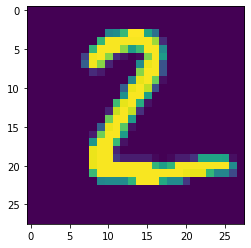



Noise Image


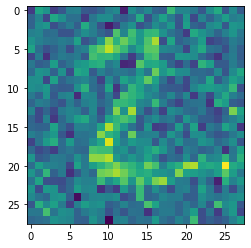



Denoised Image by Autoencoder


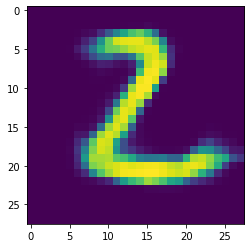



Batch NUmber 2




Original Image


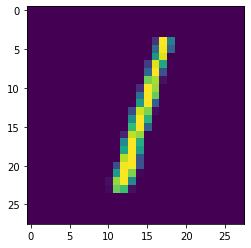



Noise Image


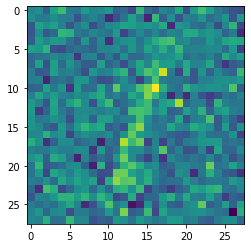



Denoised Image by Autoencoder


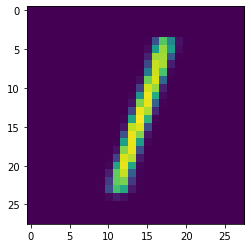



Batch NUmber 3




Original Image


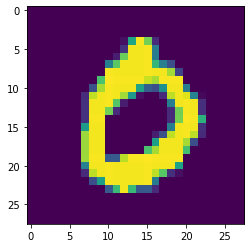



Noise Image


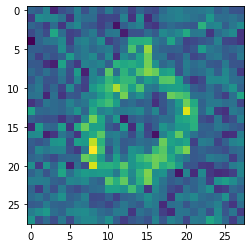



Denoised Image by Autoencoder


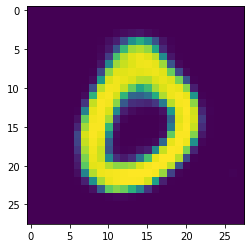



Batch NUmber 4




Original Image


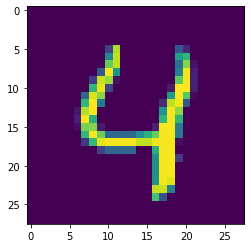



Noise Image


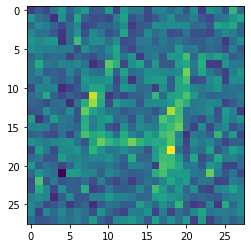



Denoised Image by Autoencoder


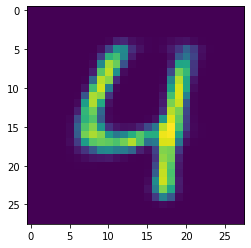



Batch NUmber 5




Original Image


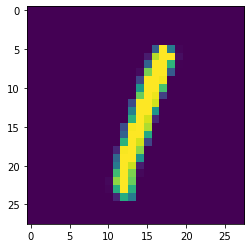



Noise Image


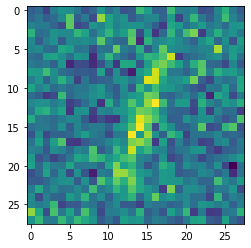



Denoised Image by Autoencoder


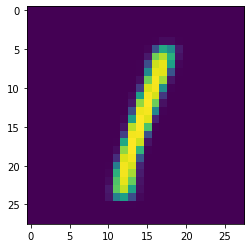



Batch NUmber 6




Original Image


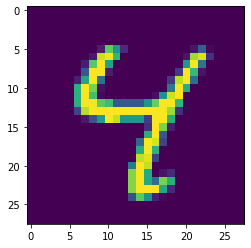



Noise Image


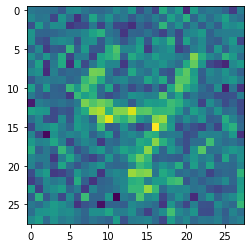



Denoised Image by Autoencoder


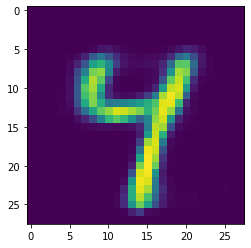



Batch NUmber 7




Original Image


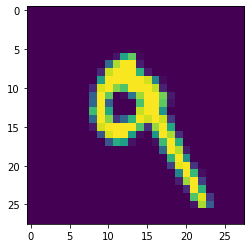



Noise Image


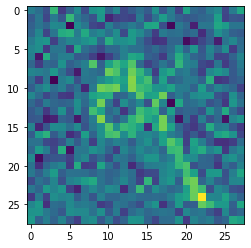



Denoised Image by Autoencoder


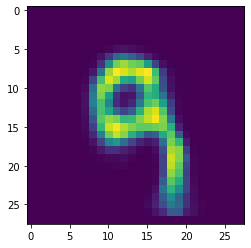



Batch NUmber 8




Original Image


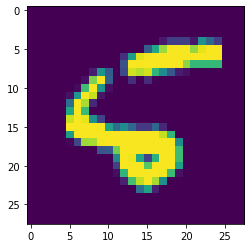



Noise Image


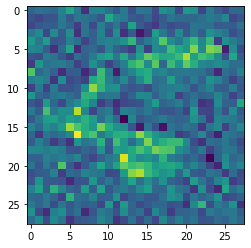



Denoised Image by Autoencoder


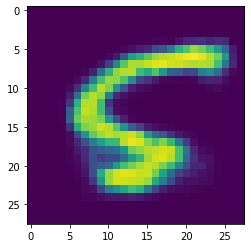



Batch NUmber 9




Original Image


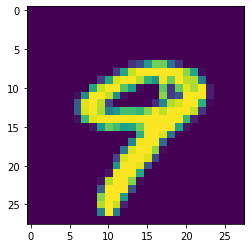



Noise Image


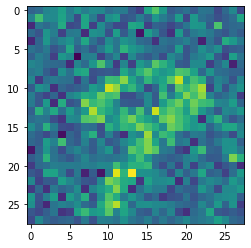



Denoised Image by Autoencoder


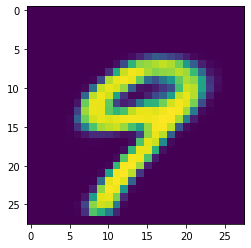

In [23]:
# Denoise IMAGE sample are being displayed along with original and Nosiey Image
for i in range(10):
    print("Batch NUmber " + str(i))
    print("\n")
    print("\n")
    print("Original Image")
    plt.imshow(X_test[i])
    plt.show()
    print("\n")
    print("Noise Image")
    plt.imshow(noisey_image[i])
    plt.show()
    print("\n")
    print("Denoised Image by Autoencoder")
    plt.imshow(denoisey_image[i])
    plt.show()
    print("\n")